In [79]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download('stopwords')
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...', '«', '»', ';', '–', '--', '@']
stop_words = stopwords.words("english")
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [80]:
data = pd.read_csv(r'C:\Users\mayko\OneDrive\Рабочий стол\stazha projects\train.csv')
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [97]:
def preprocess(df):
    lemmatizer = WordNetLemmatizer()
    stop_words = list(set(stopwords.words('english')))#.extend(['http', 'co'])
    stop_words += ['http', 'https','co']

    preprocessed_texts = []
    for text in df['text']:

        text = re.sub('[^a-zA-Z]', ' ', text)
        text = re.sub(r'\s+', ' ', text)
        tokens = word_tokenize(text.lower())

        lemmas = [lemmatizer.lemmatize(token) for token in tokens if (token not in stop_words + punctuation_marks)]
        no_single_lemmas = []
        for lemma in lemmas:
            if len(lemma) > 1:
                no_single_lemmas.append(lemma)
        preprocessed_texts.append(' '.join(no_single_lemmas))
    try:
      preprocessed_df = pd.DataFrame({'text': preprocessed_texts, 'target': df['target']})
    except KeyError:
      preprocessed_df = pd.DataFrame({'text': preprocessed_texts, 'target': ''})
    return preprocessed_df

In [98]:
preprocessed_data = preprocess(data)
preprocessed_data

,text,target
0,deed reason earthquake may allah forgive,1
1,forest fire near la ronge sask canada,1
2,resident asked shelter place notified officer ...,1
3,people receive wildfire evacuation order calif...,1
4,got sent photo ruby alaska smoke wildfire pour...,1
...,...,...
7608,two giant crane holding bridge collapse nearby...,1
7609,aria ahrary thetawniest control wild fire cali...,1
7610,utc km volcano hawaii zdtoyd ebj,1
7611,police investigating bike collided car little ...,1


In [101]:
# считаем все слова в датафрейме
def most_common_words(texts):
    word_count = {}
    for t in texts:
        for w in t.split():
            if w not in word_count:
                word_count[w] = 1
            else:
                word_count[w] += 1
    word_count = dict(sorted(word_count.items(), key=lambda x: x[1], reverse = True))
    return word_count

In [102]:
words = most_common_words(list(preprocessed_data['text']))
words = dict(sorted(words.items(), key=lambda x: x[1], reverse = True))
words

{'fire': 356,
 'like': 350,
 'amp': 344,
 'get': 255,
 'new': 228,
 'via': 220,
 'news': 213,
 'one': 209,
 'people': 201,
 'time': 181,
 'year': 178,
 'video': 175,
 'disaster': 162,
 'emergency': 159,
 'body': 155,
 'day': 151,
 'home': 144,
 'police': 143,
 'building': 141,
 'would': 137,
 'go': 137,
 'life': 132,
 'family': 132,
 'say': 131,
 'still': 129,
 'storm': 128,
 'got': 126,
 'crash': 125,
 'back': 122,
 'california': 121,
 'burning': 121,
 'bomb': 121,
 'look': 120,
 'know': 120,
 'suicide': 120,
 'man': 117,
 'death': 117,
 'world': 117,
 'car': 116,
 'train': 116,
 'flood': 115,
 'rt': 114,
 'see': 112,
 'pm': 111,
 'attack': 110,
 'first': 109,
 'love': 107,
 'two': 104,
 'make': 104,
 'going': 104,
 'nuclear': 104,
 'today': 102,
 'let': 102,
 'war': 102,
 'dead': 99,
 'killed': 99,
 'accident': 98,
 'youtube': 98,
 'gt': 96,
 'want': 95,
 'hiroshima': 95,
 'full': 94,
 'woman': 94,
 'need': 93,
 'old': 93,
 'take': 91,
 'weapon': 90,
 'may': 89,
 'way': 89,
 'good': 

min:1
1st quantile:1.0
median:1.0
3rd quantile:2.0
max:356


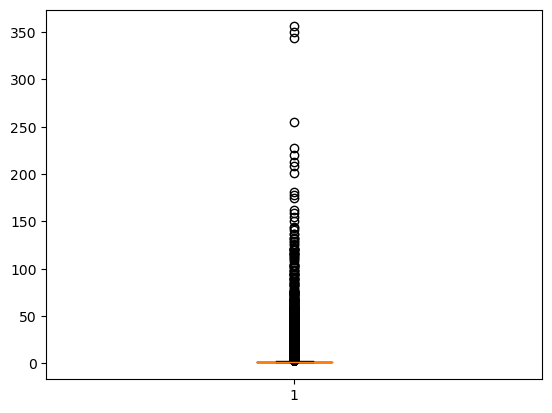

In [103]:
vals = list(words.values())
stats = {
    'min': np.min(vals),
    '1st quantile': np.percentile(vals, 25),
    'median': np.median(vals),
    '3rd quantile': np.percentile(vals, 75),
    'max': np.max(vals),
}
for k, v in stats.items():
    print(f'{k}:{v}')
plt.boxplot(vals)
plt.show()
# words = {key: value for key, value in words.items() if value > np.percentile(vals, 1) and value < np.percentile(vals, 99.9)}

In [104]:
words = {key: value for key, value in words.items() if value > 3 and value < 1000}
print(len(words))

3345


In [105]:
preprocessed_data = preprocess(data)
X = preprocessed_data['text']
y = preprocessed_data['target']

In [106]:
# из самых частых
vectorizer = CountVectorizer(max_features=3000, min_df=5) 
X = vectorizer.fit_transform(X).toarray()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [37]:
# here is the part where i checked the best n_estimators value
scores =[]
for i in range(1, 60):
    les = RandomForestClassifier(n_estimators=i)
    les.fit(X_train, y_train)
    y_pred = les.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

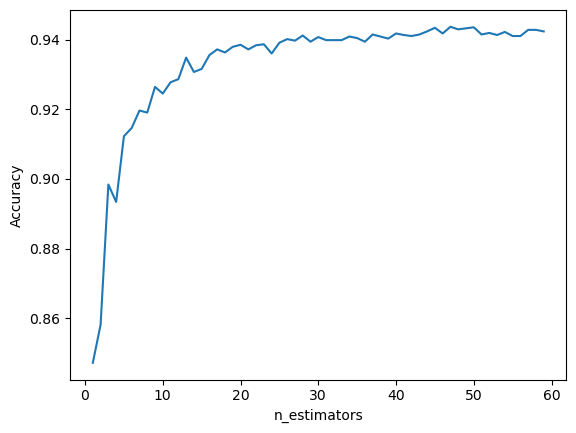

In [38]:
# 50 seems optimal
plt.plot(range(1, 60), scores)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

In [108]:
classifier = RandomForestClassifier(n_estimators=50, random_state=0) 
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=50, random_state=0)

In [109]:
y_pred = classifier.predict(X_test)

In [110]:
 print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred)) 
print(accuracy_score(y_test, y_pred)) 

[[705 169]
 [194 455]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       874
           1       0.73      0.70      0.71       649

    accuracy                           0.76      1523
   macro avg       0.76      0.75      0.76      1523
weighted avg       0.76      0.76      0.76      1523

0.7616546290216678


In [111]:
# another sample
# wow
scores = []
for state in range(1,120,2):
    _, X_test, _, y_test = train_test_split(X, y, 
                                            test_size=np.random.uniform(0,1), 
                                            random_state=state)
    y_pred = classifier.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
# print(confusion_matrix(y_test,y_pred)) 
# print(classification_report(y_test,y_pred)) 
# print(accuracy_score(y_test, y_pred)) 

In [112]:
# mean accuracy -- 94%
print(np.mean(scores))

0.9407588849472786


In [113]:
# i think i'm ready to solve the competition
rdata = pd.read_csv(r'C:\Users\mayko\OneDrive\Рабочий стол\stazha projects\test.csv')
rdata

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [114]:
preprocessed_rd = preprocess(rdata)
preprocessed_rd

,text,target
0,happened terrible car crash,
1,heard earthquake different city stay safe ever...,
2,forest fire spot pond goose fleeing across str...,
3,apocalypse lighting spokane wildfire,
4,typhoon soudelor kill china taiwan,
...,...,...
3258,earthquake safety los angeles safety fastener ...,
3259,storm ri worse last hurricane city amp others ...,
3260,green line derailment chicago utbxlcbiuy,
3261,meg issue hazardous weather outlook hwo rbqjhn,


In [115]:
X = vectorizer.transform(preprocessed_rd['text']).toarray()

In [116]:
y_pred = classifier.predict(X)

In [117]:
preprocessed_rd['target'] = y_pred
preprocessed_rd

,text,target
0,happened terrible car crash,1
1,heard earthquake different city stay safe ever...,1
2,forest fire spot pond goose fleeing across str...,1
3,apocalypse lighting spokane wildfire,1
4,typhoon soudelor kill china taiwan,1
...,...,...
3258,earthquake safety los angeles safety fastener ...,1
3259,storm ri worse last hurricane city amp others ...,1
3260,green line derailment chicago utbxlcbiuy,1
3261,meg issue hazardous weather outlook hwo rbqjhn,0
